In [1]:
from matplotlib import pyplot as plt 
import numpy as np 
from math import sqrt

In [2]:
STATES = 19
START = STATES//2+1
RUNS = 100
EPISODES = 10
ALPHAS = np.linspace(0,1,40)
#ALPHAS = np.linspace(.4,.5,2)
NSTEPS = 2 ** np.arange(10)
# NSTEPS = 2 ** np.arange(2)
GAMMA = 1
VSTAR = np.linspace(-((STATES//2))/(STATES//2+1),((STATES//2))/(STATES//2+1),STATES)

In [3]:
def walk(start):
    trajectory = []
    s = start
    while(True):
        a = 1 if np.random.randint(2) == 1 else -1
        sP = s + a
        r = 1 if sP == STATES+1 else -1 if sP == 0 else 0
        trajectory.append([s,a,r,sP])
        s = sP
        if s == 0 or s == STATES+1:
            break
    return trajectory

In [4]:
def rms(numbers,expecteds):
    total = 0
    for number,expected in zip(numbers, expecteds):
        total+= (number-expected)**2
    return sqrt((total/len(numbers)))

In [5]:
def algorithm(n):
    alphasLine = []
    for alpha in ALPHAS:
        RMSs = []
        for _ in range(RUNS):
            V = np.full((STATES+2),0.0)

            for _ in range(EPISODES):
                trajectory = walk(START)
                
                T = len(trajectory)-1
                t = 1
                while(True):
                    tau = t - n + 1
                    if tau >= 0:
                        runningSum = 0
                        for i in range(tau+1,min(tau+n,T)+1):
                            runningSum += GAMMA**(i-tau-1) * trajectory[i][2]
                        G = runningSum
                        if tau + n < T:
                            G += GAMMA ** n * V[trajectory[tau+n][0]]
                        V[trajectory[tau][0]] += alpha * (G - V[trajectory[tau][0]])
                    if(tau == T - 1):
                        break
                    t += 1
            RMSs.append(rms(V,VSTAR))
        averageRMS = np.mean(RMSs)
        alphasLine.append(averageRMS)
    return alphasLine

In [6]:
lines = []
for n in NSTEPS:
    lines.append(algorithm(n))

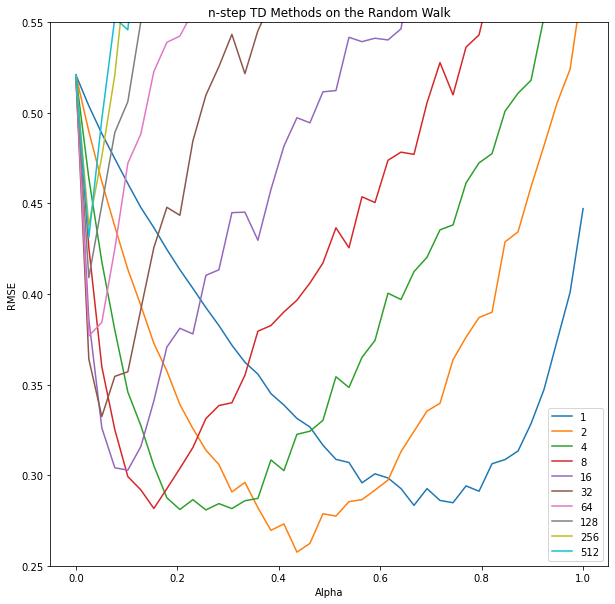

In [10]:
plt.figure(figsize=(10,10))
for line,n in zip(lines,NSTEPS):
    plt.plot(ALPHAS,line,label=n)
plt.legend()
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.title("n-step TD Methods on the Random Walk")
plt.ylim(.25,.55)
plt.savefig("../figures/example7-1/nstepTDMethodsontheRandomWalk")
